<a href="https://colab.research.google.com/github/Xiar-fatah/Cat_vs_Dog/blob/master/NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load in the images and store them in google colab
! git clone https://github.com/Xiar-fatah/Cat_vs_Dog.git



Cloning into 'Cat_vs_Dog'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 37485 (delta 36), reused 68 (delta 25), pack-reused 37399
Receiving objects: 100% (37485/37485), 828.57 MiB | 45.62 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Checking out files: 100% (37511/37511), done.


In [0]:
#The needed modules for the project
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim








In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #The network
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels = 32, out_channels =  64, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()

        self.fc1 = nn.Linear(238144, 100)
        self.fc2 = nn.Linear(100, 2)


    def forward(self, t):
        #Transfers the tensor to the GPU.
        t.cuda(device) 
        t = self.layer1(t)
        t = self.layer2(t)
        #Flatten out the tensor
        t = t.reshape(t.size(0), -1)
        t = self.drop_out(t)
        t = self.fc1(t)
        t = self.fc2(t)
        return t


Epoch [1/4], Step [100/6250], Loss: 0.6455, Accuracy: 50.00%
Epoch [1/4], Step [200/6250], Loss: 0.6647, Accuracy: 50.00%
Epoch [1/4], Step [300/6250], Loss: 0.2809, Accuracy: 100.00%
Epoch [1/4], Step [400/6250], Loss: 0.7433, Accuracy: 25.00%
Epoch [1/4], Step [500/6250], Loss: 0.8088, Accuracy: 50.00%
Epoch [1/4], Step [600/6250], Loss: 0.6110, Accuracy: 50.00%
Epoch [1/4], Step [700/6250], Loss: 0.6249, Accuracy: 50.00%
Epoch [1/4], Step [800/6250], Loss: 0.8076, Accuracy: 25.00%
Epoch [1/4], Step [900/6250], Loss: 0.6061, Accuracy: 50.00%
Epoch [1/4], Step [1000/6250], Loss: 0.5027, Accuracy: 75.00%
Epoch [1/4], Step [1100/6250], Loss: 0.6010, Accuracy: 100.00%
Epoch [1/4], Step [1200/6250], Loss: 0.4804, Accuracy: 100.00%
Epoch [1/4], Step [1300/6250], Loss: 0.5498, Accuracy: 100.00%
Epoch [1/4], Step [1400/6250], Loss: 1.0898, Accuracy: 75.00%
Epoch [1/4], Step [1500/6250], Loss: 0.2502, Accuracy: 100.00%
Epoch [1/4], Step [1600/6250], Loss: 0.9313, Accuracy: 25.00%
Epoch [1/4],

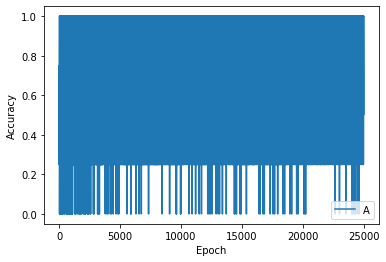

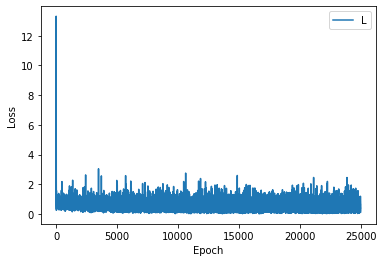

In [4]:
if __name__ == "__main__":
    ####################### Prepossessing Data #######################
    train_dir = '/content/Cat_vs_Dog/Data/dataset' 
    test_dir = '/content/Cat_vs_Dog/Data/testset' 
    mean = [0.485, 0.456, 0.406] 
    std  = [0.229, 0.224, 0.225]

    """
    To build a generalized classification network it is need of adaption. 
    Therefore the training images are angled or cropped in a certain way.
    Hence the network can as us humans note it is a dog when it looks at
    a image that is flipped by 90 degrees, by doing so the accuracy obtains
    a higher value. The images are then randomaly rotated.

    """
    transforms= transforms.Compose([
            transforms.Resize((256,256)),
            transforms.RandomRotation(30),
            #transforms.CenterCrop(100),
            #transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)])
    
    train_dataset = datasets.ImageFolder(train_dir, transform=transforms)

    trainloader = torch.utils.data.DataLoader(train_dataset , batch_size=4, #try new batch_sizes
                                              shuffle=True, num_workers=4)
    test_dataset = datasets.ImageFolder(test_dir, transform=transforms)
    
    testloader = torch.utils.data.DataLoader(train_dataset , batch_size=4,
                                              shuffle=False, num_workers=4)
    ####################### Prepossessing Data #######################
    model = CNN()
    """
    The first line checks if a GPU is available, if it is not then use CPU,
    Then alert the GPU about the model.
    """
    use_cuda = torch.cuda.is_available()
    device = torch.device('cuda:0' if use_cuda else 'cpu')
    model.cuda(device)
    #Parameters
    learning_rate = 0.0001 
    num_epochs = 4
    #Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    #Train the model
    total_step = len(trainloader)
    loss_list = []
    acc_list = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(trainloader):
            #Transfers the tensors to the GPU
            images, labels = images.to(device), labels.to(device)
            #Zeros the optimizers parameters
            optimizer.zero_grad()

            #Forward propagation
            outputs = model(images)

            #Loss function
            loss = criterion(outputs, labels)
            loss_list.append(loss.item())
    
            #Backpropagation and perform Adam optimisation
            loss.backward()
            optimizer.step()
    
            #Track the accuracy
            total = labels.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            acc_list.append(correct / total)
    
            if (i + 1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                              (correct / total) * 100))
    
    ####################### Plotting #######################
    images = np.linspace(0,len(loss_list)-1,len(loss_list))
    plt.figure()  
    plt.plot(images, acc_list)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(("Accuracy"))
    plt.figure()
    plt.plot(images, loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(("Loss"))

    ####################### Testing #######################
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))
